In [14]:

from matplotlib import pyplot as plt
import numpy as np
from gtts import gTTS
import os
import json
import pyphen
import syllables
import pandas as pd
from scipy.interpolate import make_interp_spline



In [15]:


def draw_chart(df):

    
    rows_count = len(df.groupby('speaker_label').count())
    
    
    for i in range(rows_count):
        
        spk= df.loc[df['speaker_label']=='spk_%d'%i]
        
        x_axis , y_axis = np.array(spk['start_time']), spk['syllables_count']
        
        
        
         
        dataframe = pd.DataFrame({'time': x_axis, 'syllables': y_axis})

        
        plt.plot(x_axis  ,y_axis , label= 'spk_%d'%i)
        
        plt.title('Speech tempo ')
        plt.xlabel('Time in Seconds')
        plt.ylabel('syllables ')
        
    plt.legend() # to show the labels in the chart 
    plt.show()



In [16]:
def split_word_into_syllable(word):
    a = pyphen.Pyphen(lang='de')
    return a.inserted(word)


In [17]:
def create_new_json(file_path):
    
    json_object=[]
    
    f= open(file_path)
    data = json.load(f)
    
    
    for index in range(len(data)):
            
            
            for element in data[index]['sentences']:
                
                
                x ={}
                x['speaker_label'] = data[index]['speaker_label']
            
                x['text'] = element['text']
            
                x['syllables'] = split_word_into_syllable(x['text'])
                
                x['syllables_count']= syllables.estimate(x['syllables'])
            
                x['start_time'] =float( element['start_time'])
            
                x['end_time'] =  float(element['end_time'])
                
                x['total_time'] = x['end_time'] - x['start_time']
                json_object.append(x)
            
    
    return pd.json_normalize(json_object)
            

In [18]:
df = create_new_json('output_conversation.json')
df


,speaker_label,text,syllables,syllables_count,start_time,end_time,total_time
0,spk_0,"Das ist der sächsische Landtag in Dresden, das...",Das ist -der -säch-si-sche -Land-tag in Dres-d...,29,0.77,9.77,9.00
1,spk_0,Wozu braucht Sachsen einen Landtag?,Wo-zu -braucht Sach-sen ei-nen -Land-tag?,9,10.37,12.16,1.79
2,spk_0,Wir,Wir,1,12.17,12.61,0.44
3,spk_1,leben in einer Demokratie aller fßcnf Jahre wä...,le-ben in ei-ner -De-mo-kra-tie al-ler fß-cn-f...,42,12.88,24.58,11.70
4,spk_1,"Wir werden Gesetze beschlossen, die Abgeordnet...","Wir wer-den -Ge-set-ze -be-schlos-sen, -die -A...",41,25.04,34.35,9.31
5,spk_0,die Interessen der sächsischen Bürger werden d...,die -In-ter-es-sen- -der -säch-si-schen -Bür-g...,21,38.16,42.75,4.59
6,spk_0,Dem sächsischen Landtag gehören aktuell 119 Ab...,Dem -säch-si-schen -Land-tag -ge-hö-ren ak-tu-...,30,43.88,57.27,13.39
7,spk_0,"Bevor Gesetze zur Abstimmung kommen, diskutier...","Be-vor- -Ge-set-ze -zur Ab-stim-mung -kom-men,...",23,57.81,62.58,4.77
8,spk_0,Dort können auch Experten zu Wort kommen.,Dor-t -kön-nen auch -Ex-per-ten- -zu Wor-t -ko...,9,63.16,65.17,2.01
9,spk_0,Auch jeder Bürger in Sachsen hat die Möglichke...,Auch je-der -Bür-ger in Sach-sen hat -die Mög-...,16,67.02,70.28,3.26


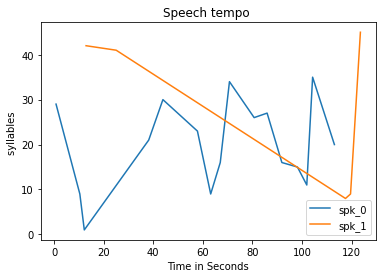

In [19]:

spk_0= df.loc[df['speaker_label']=='spk_0']
draw_chart(df)

In [20]:
texts = []
spkDict = {}
spkTime = {}

x_axis=[]
y_axis=[]


f = open('output_conversation.json', 'r') 
data = json.loads(f.read()) 


for x in range(len(data)):
        
    for y in data[x]['sentences']:
            
        start = float(y['start_time'])
        end = float(y['end_time'])
        total = end - start

        syllable = split_word_into_syllable(y['text']).replace(' -', ' ')



        if data[x]['speaker_label']!='spk_1':

           x_axis.append(start)

           y_axis.append(syllables.estimate(syllable))

        texts.append(syllable)
    speaker = data[x]['speaker_label']

    if speaker in spkDict:
        spkDict[speaker].extend(texts)
    else:
        spkDict[speaker] = texts
    texts = []
        
